In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**1. Считать в pandas.DataFrame любой источник данных:**

In [63]:
# Загрузка данных
df = pd.read_csv('speed_data.csv', sep=',')

**2. Датасет и подготовка данных, этап 1:**

Описание датасета

В 2002–2004 годах Колумбийский университет провел эксперимент по быстрым свиданиям, в ходе которого они отслеживали данные 21 сеанса быстрых свиданий, в основном среди молодых людей, встречающихся с людьми противоположного пола.

In [64]:
df.head(10)

gender   age   income  goal  career  dec  attr  sinc  intel  fun   amb  \
0       0  21.0  69487.0   2.0  lawyer    1   6.0   9.0    7.0  7.0   6.0   
1       0  21.0  69487.0   2.0  lawyer    1   7.0   8.0    7.0  8.0   5.0   
2       0  21.0  69487.0   2.0  lawyer    1   5.0   8.0    9.0  8.0   5.0   
3       0  21.0  69487.0   2.0  lawyer    1   7.0   6.0    8.0  7.0   6.0   
4       0  21.0  69487.0   2.0  lawyer    1   5.0   6.0    7.0  7.0   6.0   
5       0  21.0  69487.0   2.0  lawyer    0   4.0   9.0    7.0  4.0   6.0   
6       0  21.0  69487.0   2.0  lawyer    1   7.0   6.0    7.0  4.0   6.0   
7       0  21.0  69487.0   2.0  lawyer    0   4.0   9.0    7.0  6.0   5.0   
8       0  21.0  69487.0   2.0  lawyer    1   7.0   6.0    8.0  9.0   8.0   
9       0  21.0  69487.0   2.0  lawyer    1   5.0   6.0    6.0  8.0  10.0   

   shar  like  prob  met  
0   5.0   7.0   6.0  2.0  
1   6.0   7.0   5.0  1.0  
2   7.0   7.0   NaN  1.0  
3   8.0   7.0   6.0  2.0  
4   6.0   6.0   6.0  2.0  
5   4.0   6.0   5.0  2.0  
6   7.0   6.0   5.0  2.0  
7   6.0   6.0   7.0  NaN  
8   8.0   7.0   7.0  2.0  
9   8.0   6.0   6.0  2.0


Видно, что в датасете есть и числовые, и категориальные признаки.

In [65]:
df.describe()

gender          age         income         goal          dec  \
count  8378.000000  8283.000000    4279.000000  8299.000000  8378.000000   
mean      0.500597    26.358928   44887.606450     2.122063     0.419909   
std       0.500029     3.566763   17206.920962     1.407181     0.493573   
min       0.000000    18.000000    8607.000000     1.000000     0.000000   
25%       0.000000    24.000000   31516.000000     1.000000     0.000000   
50%       1.000000    26.000000   43185.000000     2.000000     0.000000   
75%       1.000000    28.000000   54303.000000     2.000000     1.000000   
max       1.000000    55.000000  109031.000000     6.000000     1.000000   

              attr         sinc        intel          fun          amb  \
count  8176.000000  8101.000000  8082.000000  8028.000000  7666.000000   
mean      6.189995     7.175164     7.368597     6.400598     6.777524   
std       1.950169     1.740315     1.550453     1.953702     1.794055   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     6.000000     5.000000     6.000000   
50%       6.000000     7.000000     7.000000     7.000000     7.000000   
75%       8.000000     8.000000     8.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

              shar         like         prob          met  
count  7311.000000  8138.000000  8069.000000  8003.000000  
mean      5.474559     6.134087     5.207523     0.948769  
std       2.156363     1.841285     2.129565     0.989889  
min       0.000000     0.000000     0.000000     0.000000  
25%       4.000000     5.000000     4.000000     0.000000  
50%       6.000000     6.000000     5.000000     0.000000  
75%       7.000000     7.000000     7.000000     2.000000  
max      10.000000    10.000000    10.000000     8.000000

Предобработка данных

In [66]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

gender       0
age         95
income    4099
goal        79
career      89
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64


In [67]:
data = df.copy()
data.shape

(8378, 15)

In [68]:
data.dropna(inplace=True)

In [69]:
print('Размерность до', df.shape)

Размерность до (8378, 15)


In [70]:
print('Размерность после', data.shape)

Размерность после (3501, 15)


In [71]:
# Замена пустых значений в числовых столбцах средним значением
numerical_columns = data.select_dtypes(include=[np.number]).columns
df[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [72]:
# Замена пустых значений в категориальных столбцах модой
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [73]:
# Удаление пустых значений
df_cleaned = df.dropna()

In [74]:
df_cleaned.head(20)

gender   age   income  goal              career  dec  attr  sinc  intel  \
0      0.0  21.0  69487.0   2.0              lawyer  1.0   6.0   9.0    7.0   
1      0.0  21.0  69487.0   2.0              lawyer  1.0   7.0   8.0    7.0   
3      0.0  21.0  69487.0   2.0              lawyer  1.0   7.0   6.0    8.0   
4      0.0  21.0  69487.0   2.0              lawyer  1.0   5.0   6.0    7.0   
5      0.0  21.0  69487.0   2.0              lawyer  0.0   4.0   9.0    7.0   
6      0.0  21.0  69487.0   2.0              lawyer  1.0   7.0   6.0    7.0   
8      0.0  21.0  69487.0   2.0              lawyer  1.0   7.0   6.0    8.0   
9      0.0  21.0  69487.0   2.0              lawyer  1.0   5.0   6.0    6.0   
10     0.0  24.0  65929.0   1.0                 law  0.0   5.0   7.0    8.0   
11     0.0  24.0  65929.0   1.0                 law  0.0   8.0   5.0    6.0   
12     0.0  24.0  65929.0   1.0                 law  0.0   5.0   8.0    9.0   
13     0.0  24.0  65929.0   1.0                 law  1.0   7.0   9.0    7.0   
14     0.0  24.0  65929.0   1.0                 law  0.0   6.0   8.0    7.0   
15     0.0  24.0  65929.0   1.0                 law  0.0   8.0   7.0    8.0   
16     0.0  24.0  65929.0   1.0                 law  1.0   7.0   5.0    9.0   
17     0.0  24.0  65929.0   1.0                 law  0.0   5.0   8.0    7.0   
18     0.0  24.0  65929.0   1.0                 law  1.0   7.0   6.0    8.0   
19     0.0  24.0  65929.0   1.0                 law  1.0   6.0   7.0    8.0   
30     0.0  23.0  37754.0   1.0  lawyer/policy work  0.0   4.0  10.0    8.0   
31     0.0  23.0  37754.0   1.0  lawyer/policy work  0.0   8.0   7.0    8.0   

     fun   amb  shar  like  prob  met  
0    7.0   6.0   5.0   7.0   6.0  2.0  
1    8.0   5.0   6.0   7.0   5.0  1.0  
3    7.0   6.0   8.0   7.0   6.0  2.0  
4    7.0   6.0   6.0   6.0   6.0  2.0  
5    4.0   6.0   4.0   6.0   5.0  2.0  
6    4.0   6.0   7.0   6.0   5.0  2.0  
8    9.0   8.0   8.0   7.0   7.0  2.0  
9    8.0  10.0   8.0   6.0   6.0  2.0  
10   4.0   6.0   3.0   6.0   4.0  2.0  
11   6.0   9.0   6.0   7.0   3.0  2.0  
12   6.0   3.0   4.0   6.0   7.0  2.0  
13   6.0   5.0   7.0   7.0   8.0  2.0  
14   9.0   7.0   8.0   8.0   6.0  1.0  
15   3.0   6.0   2.0   6.0   5.0  2.0  
16   6.0   7.0   9.0   8.0   7.0  2.0  
17   5.0   9.0   5.0   5.0   6.0  2.0  
18   9.0   4.0   5.0   5.0   6.0  2.0  
19   7.0   9.0   8.0   8.0   7.0  2.0  
30   5.0   8.0   7.0   6.0   7.0  2.0  
31  10.0   7.0   8.0   8.0   1.0  1.0

In [75]:
# Удаление некоторых признаков
df_cleaned = df_cleaned.drop(['career'], axis=1)

In [76]:
# Повторная проверка на наличие пропущенных значений
print(df_cleaned.isnull().sum())

gender    0
age       0
income    0
goal      0
dec       0
attr      0
sinc      0
intel     0
fun       0
amb       0
shar      0
like      0
prob      0
met       0
dtype: int64


Нормализация численных данных

In [77]:
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

Визуализация heatmap-матрицы корреляций

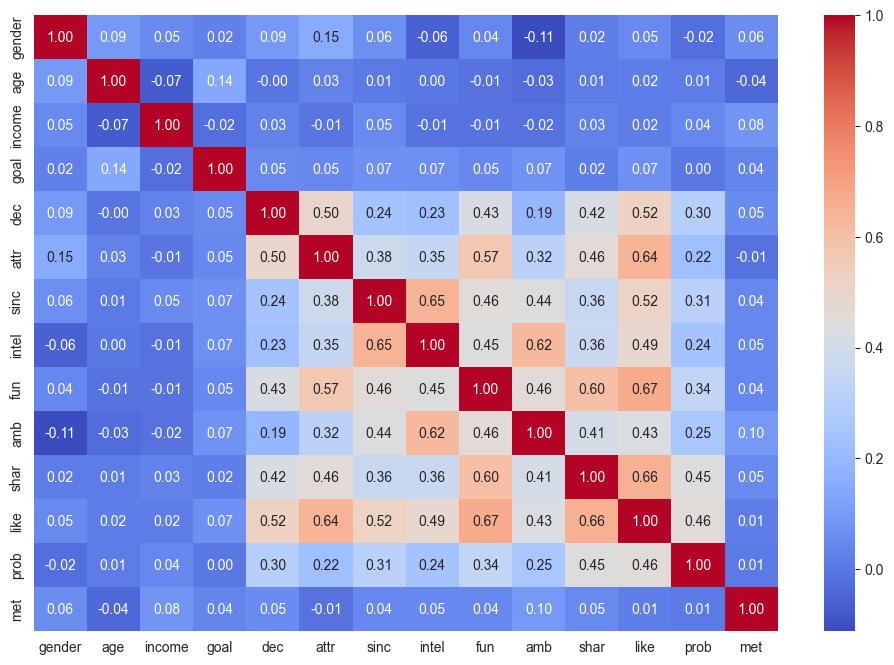

In [78]:
# Визуализация heatmap-матрицы коррелированности
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Визуализация взаимосвязей между target-переменной и каждым из признаков

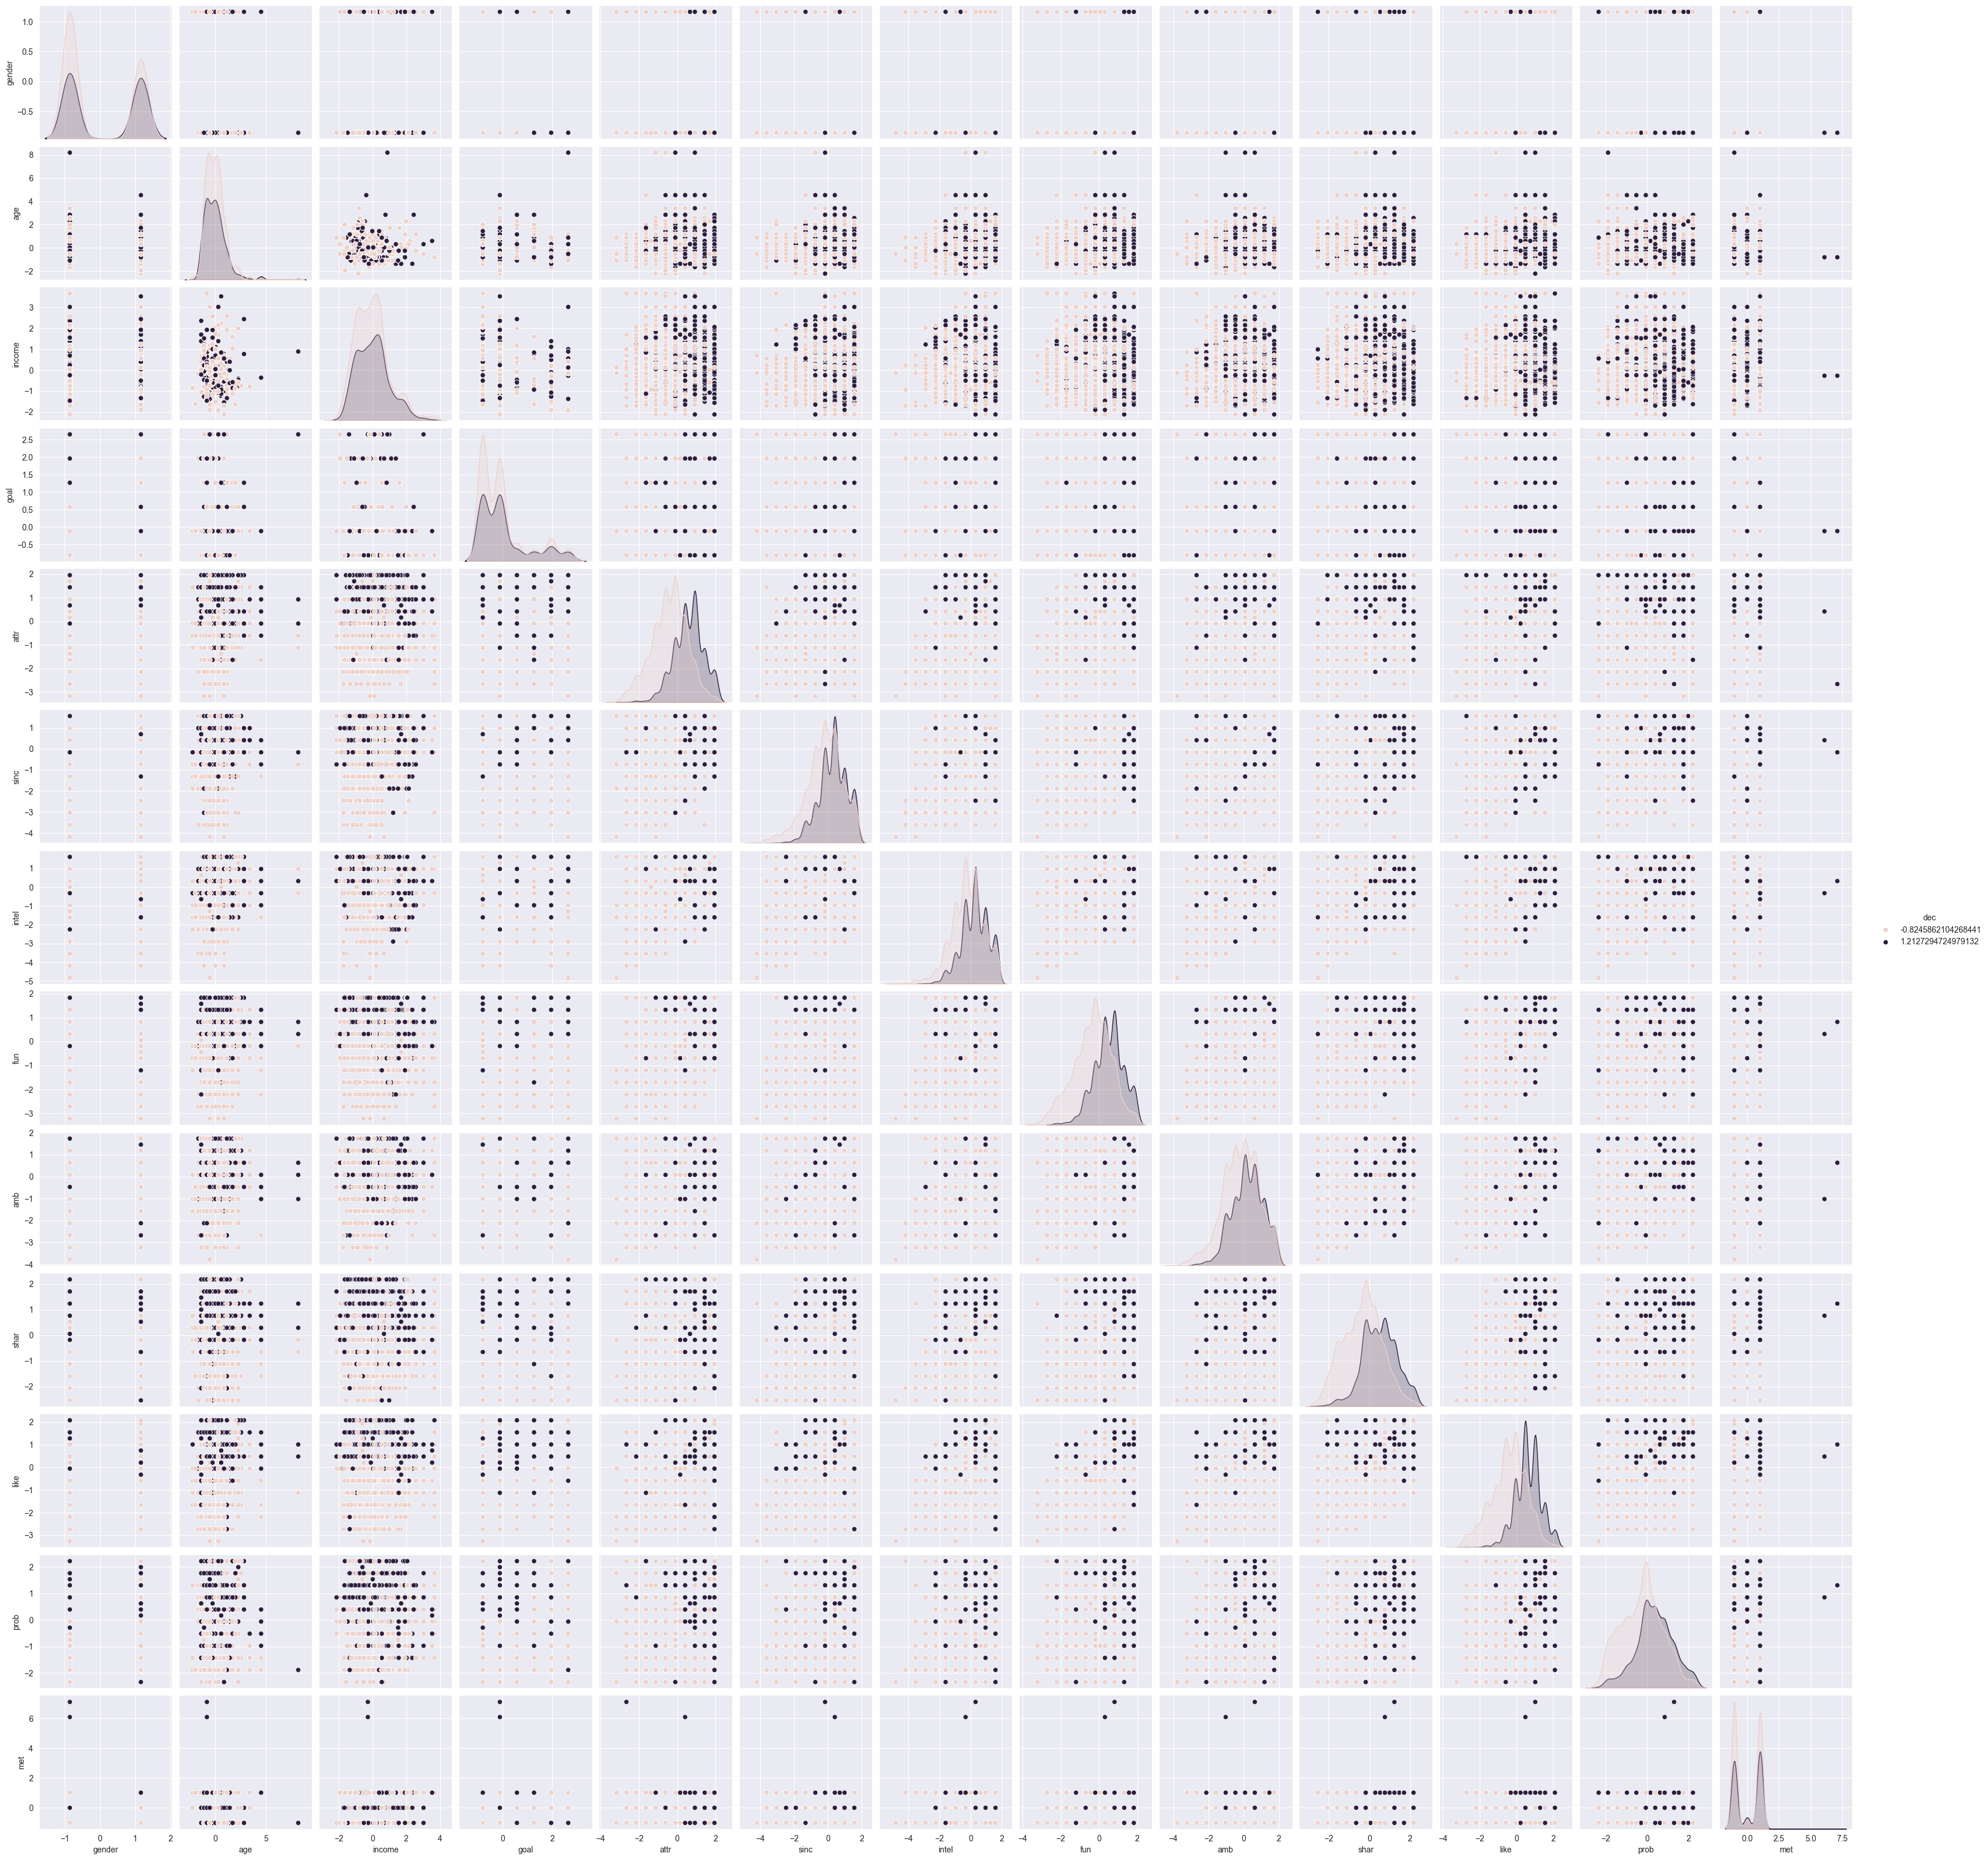

In [79]:
# Построение диаграммы попарного распределения
sns.pairplot(df_cleaned, hue='dec')
plt.show()

Разделение на обучающую и тестовую выборку

In [80]:
# Разделение выборки на обучающую и тестовую
X = df_cleaned.drop('dec', axis=1)
y = df_cleaned['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train_temp = X_train.select_dtypes(exclude=['object'])
X_test_temp = X_test.select_dtypes(exclude=['object'])

**3. Регрессия МНК:**

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Импорт прошёл успешно!")

Импорт прошёл успешно!


In [83]:
from sklearn.linear_model import LinearRegression
print("scikit-learn импортируется успешно")

scikit-learn импортируется успешно


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Обучение модели линейной регрессии

In [85]:
# Обучение модели Linear Regression
model = LinearRegression()
model.fit(X_train_temp, y_train)

LinearRegression()

In [86]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test_temp)

Вычисление метрик MSE, MAE, r2

In [87]:
# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.6422542000537592
Mean Absolute Error (MAE): 0.7075231327165121
R^2 Score: 0.3541826948441268


Вывод коэффициентов и свободного члена (intercept)

In [88]:
# Вывод коэффициентов и свободного члена
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.02650928 -0.01891964  0.0110315   0.03497476  0.2636685  -0.05264702
  0.00966898  0.07449874 -0.07982602  0.08532133  0.26102939  0.08546631
  0.05373439]
Intercept: 0.0026300202970438117


Визуализация важности коэффициентов

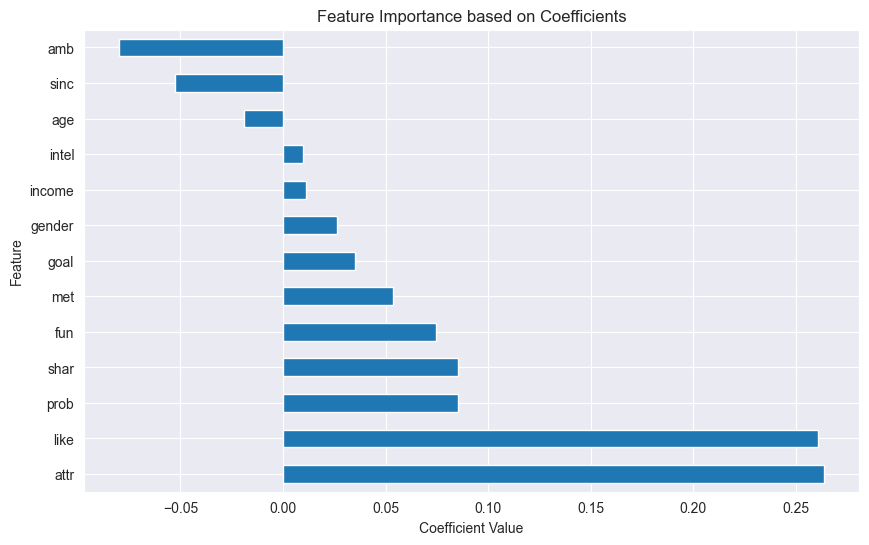

In [89]:
# Построение графика с важностью коэффициентов
plt.figure(figsize=(10, 6))
coef_importance = pd.Series(model.coef_, index=X_train_temp.columns)
coef_importance_sorted = coef_importance.sort_values(ascending=False)
coef_importance_sorted.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients')
plt.show()

**4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):**

In [90]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

Подбор параметров регуляризации

In [91]:
models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'LASSO': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]})
}

Сохраним лучшие модели сюда

In [92]:
best_models = {}

Сделаем цикл, тренируем и оценим модели Ridge, LASSO, Elastic Net

Best parameters for Ridge: {'alpha': 10}
Metrics for Ridge:
Mean Squared Error (MSE): 0.6423434156174076
Mean Absolute Error (MAE): 0.7077422570268072
R^2 Score: 0.3540929843293672
Coefficients for Ridge: [ 0.0266187  -0.01879959  0.01100199  0.03485411  0.26280067 -0.05178234
  0.00937469  0.07494502 -0.07907894  0.0856945   0.2595459   0.0853394
  0.05340747]
Intercept for Ridge: 0.0026237008601064466


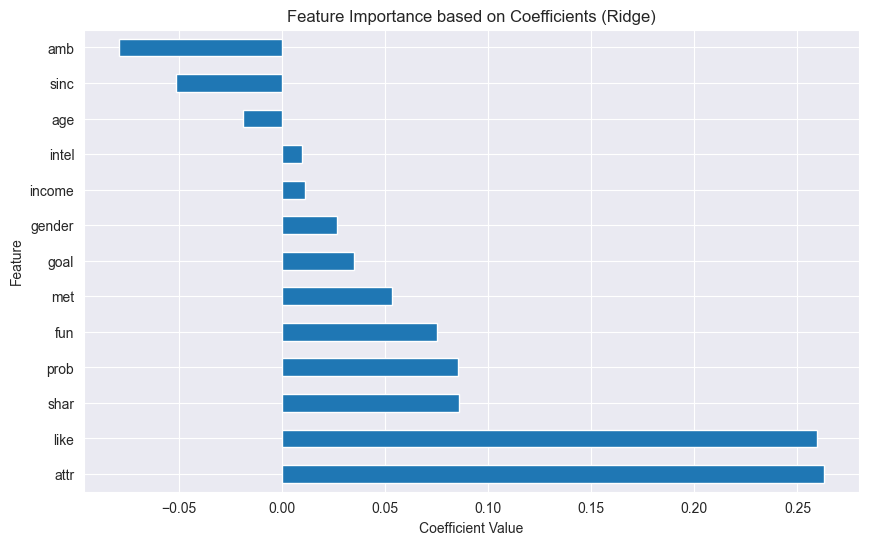

Best parameters for LASSO: {'alpha': 0.1}
Metrics for LASSO:
Mean Squared Error (MSE): 0.6802892382998343
Mean Absolute Error (MAE): 0.74717442330101
R^2 Score: 0.31593664538345423
Coefficients for LASSO: [ 0.         -0.          0.          0.          0.20374266  0.
  0.          0.01551355 -0.          0.05275564  0.24357297  0.00764631
  0.        ]
Intercept for LASSO: 0.0022499888815211613


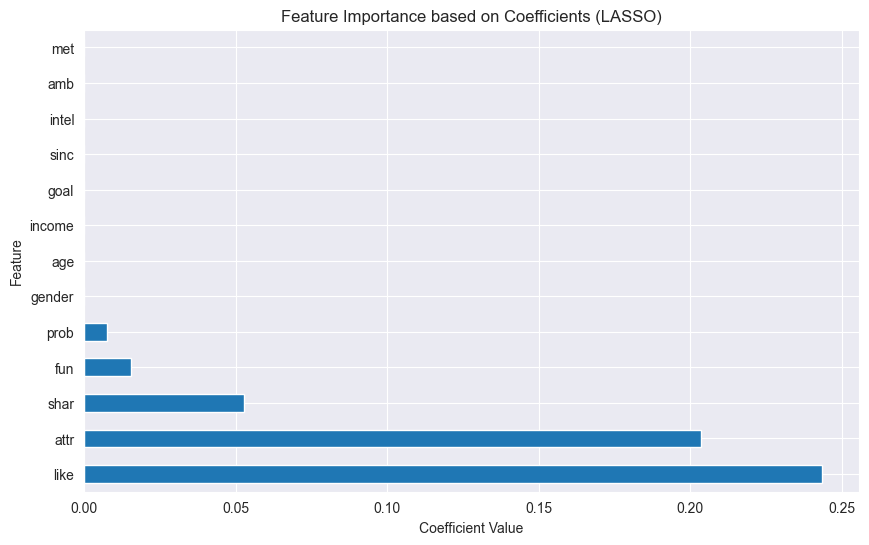

Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.1}
Metrics for Elastic Net:
Mean Squared Error (MSE): 0.6498432445117035
Mean Absolute Error (MAE): 0.7165695814211077
R^2 Score: 0.34655154779965847
Coefficients for Elastic Net: [ 0.02150028 -0.00558003  0.00206961  0.0208411   0.23758902 -0.01495836
 -0.          0.07350146 -0.04651251  0.08752786  0.22412319  0.07353707
  0.03743773]
Intercept for Elastic Net: 0.0022835627796622673


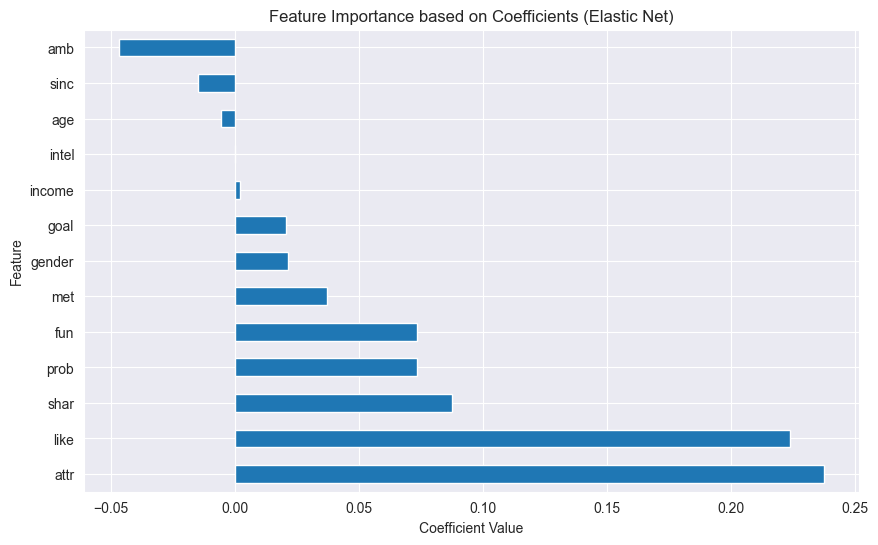

In [93]:
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_temp, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

    # Предсказание на тестовом наборе
    y_pred = best_model.predict(X_test_temp)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Metrics for {model_name}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    # Вывод коэффициентов и свободного члена
    print(f'Coefficients for {model_name}: {best_model.coef_}')
    print(f'Intercept for {model_name}: {best_model.intercept_}')

    # Построение графика с важностью коэффициентов
    plt.figure(figsize=(10, 6))
    coef_importance = pd.Series(best_model.coef_, index=X_train_temp.columns)
    coef_importance_sorted = coef_importance.sort_values(ascending=False)
    coef_importance_sorted.plot(kind='barh')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance based on Coefficients ({model_name})')
    plt.show()

**5. Датасет и подготовка данных, этап 2:**

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [95]:
data2 = df.copy()

In [96]:
data2.shape

(8378, 15)

In [97]:
# Разделение выборки на обучающую и тестовую
X = data2.drop('dec', axis=1)
y = data2['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Выберем категориальные признаки
categorical_features = X_train.select_dtypes(include=['object']).columns

In [99]:
categorical_features

Index(['career'], dtype='object')

In [100]:
# Объединим обучающую и тестовую выборки
X_combined = pd.concat([X_train, X_test], axis=0)

Применим One-Hot Encoding к категориальным признакам

In [101]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_combined_encoded = encoder.fit_transform(X_combined[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_combined_encoded_df = pd.DataFrame(X_combined_encoded, columns=encoded_columns, index=X_combined.index)


Удалим исходные категориальные признаки и добавим закодированные

In [102]:
X_combined.drop(categorical_features, axis=1, inplace=True)
X_combined = pd.concat([X_combined, X_combined_encoded_df], axis=1)

In [103]:
X.shape

(8378, 14)

In [104]:
X_combined.shape

(8378, 380)

Разделим обратно на обучающую и тестовую выборки

In [105]:
X_train_encoded = X_combined[:len(X_train)]
X_test_encoded = X_combined[len(X_train):]

In [106]:
print("Размерность X_train после кодировки:", X_train_encoded.shape)
print("Размерность X_test после кодировки:", X_test_encoded.shape)

Размерность X_train после кодировки: (6702, 380)
Размерность X_test после кодировки: (1676, 380)


**6. Регрессии, этап 2:**

In [107]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
# Обучение Linear Regression
X_train_encoded = X_train_encoded.dropna()
y_train = y_train.loc[X_train_encoded.index]  # Удалить те же строки из y
linear_reg = LinearRegression()
linear_reg.fit(X_train_encoded, y_train)

LinearRegression()

In [109]:
X_test_encoded = X_test_encoded.dropna()
y_test = y_test.loc[X_test_encoded.index]  # Синхронизировать с X

# Предсказание на тестовых данных
y_pred = linear_reg.predict(X_test_encoded)

# Получение метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print("Metrics for Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Metrics for Linear Regression:
Mean Squared Error (MSE): 0.1469911738303027
Mean Absolute Error (MAE): 0.325359379732295
R^2 Score: 0.39715264006513207


Metrics for Ridge with categorical features:
Mean Squared Error (MSE): 0.1459372468605469
Mean Absolute Error (MAE): 0.333580466662217
R^2 Score: 0.40147505667509076
Coefficients for Ridge: [ 2.46968890e-02 -4.46269128e-04  1.45923764e-07  1.41918286e-02
  7.05219977e-02 -2.08028368e-02  1.15711927e-02  1.85357560e-02
 -2.06053943e-02  1.70860227e-02  6.60894745e-02  2.58625880e-02
  3.34650446e-02  0.00000000e+00  1.37145459e-01  6.23273861e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.80578864e-02
  0.00000000e+00  2.36154799e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.40631417e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.95668604e-02  0.00000000e+00
 -9.68619634e-02  3.97181299e-02  1.64733310e-02  1.73258196e-02
  0.00000000e+00  1.78416802e-02  3.31022208e-02  6.29442788e-02
  4.29882696e-02  0.00000000e+00  1.15665713e-01  0.00000000e+00
 -3.92840043e-03  0.00000000e+00  6.20724423e-02  0.00000000e+00
 -1.08581447e-01 -9.29692429e-

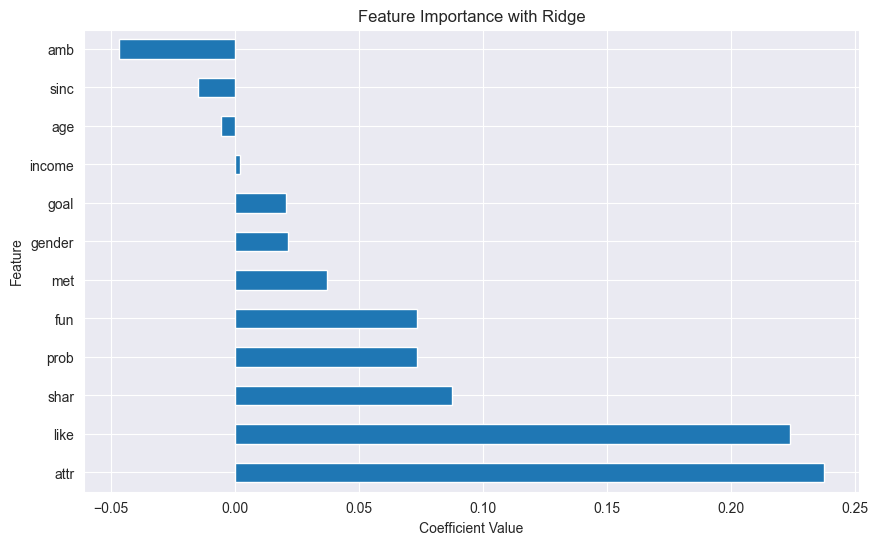

Metrics for LASSO with categorical features:
Mean Squared Error (MSE): 0.17085459102696132
Mean Absolute Error (MAE): 0.37639304800180934
R^2 Score: 0.29928283141500034
Coefficients for LASSO: [ 0.00000000e+00 -0.00000000e+00  5.06244042e-07  0.00000000e+00
  5.62627209e-02  0.00000000e+00  0.00000000e+00  3.95038832e-03
 -0.00000000e+00  1.43461692e-02  5.24915666e-02  6.51579591e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.0000000

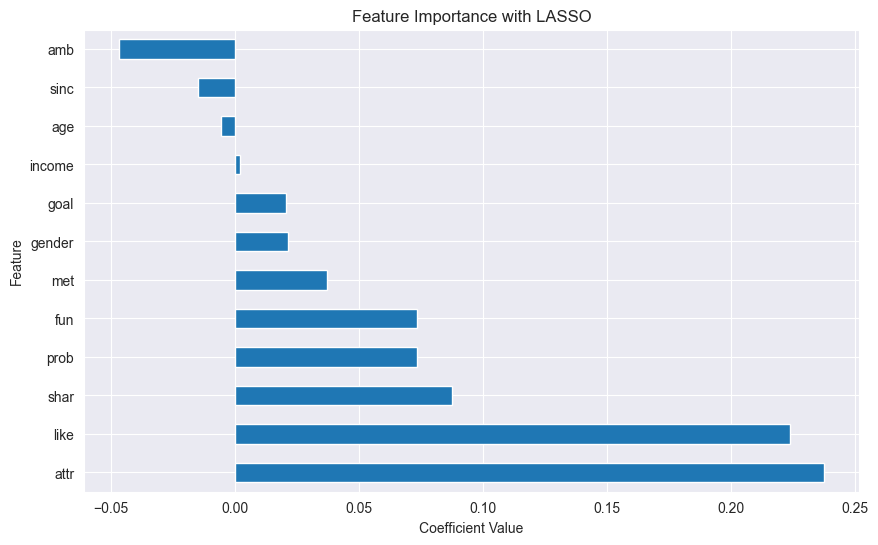

Metrics for Elastic Net with categorical features:
Mean Squared Error (MSE): 0.16487272806454104
Mean Absolute Error (MAE): 0.35977031461647146
R^2 Score: 0.3238159390868285
Coefficients for Elastic Net: [ 0.00000000e+00 -4.60640758e-04  4.94606344e-07  7.17151220e-03
  6.82902749e-02 -9.43705926e-03 -0.00000000e+00  1.80124653e-02
 -1.59445433e-02  1.86175453e-02  5.87056947e-02  1.95215539e-02
  9.53576933e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00

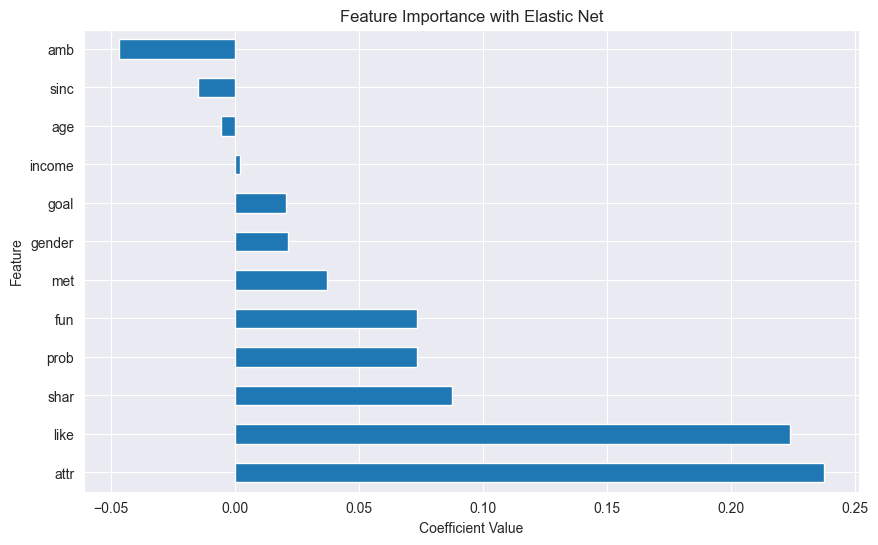

In [110]:
# Обучение Ridge, LASSO, Elastic Net с лучшими параметрами
for model_name, best_model in best_models.items():
    best_model.fit(X_train_encoded, y_train)

    # Предсказание на тестовом наборе
    y_pred = best_model.predict(X_test_encoded)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {model_name} with categorical features:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")

    # Вывод коэффициентов и свободного члена
    print(f'Coefficients for {model_name}: {best_model.coef_}')
    print(f'Intercept for {model_name}: {best_model.intercept_}')

    # Построение графика с важностью коэффициентов без значений равных 0
    plt.figure(figsize=(10, 6))
    nonzero_coef_importance = coef_importance_sorted[coef_importance_sorted != 0]
    nonzero_coef_importance.plot(kind='barh')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance with {model_name}')
    plt.show()

**Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.**

Исходя из значений метрик, Ridge Regression показывает наилучшие результаты с наименьшим MSE, наименьшим MAE и самым высоким R^2 Score. Поэтому в данном случае модель Ridge Regression кажется лучшим выбором среди представленных моделей.

In [111]:
# Предсказание на тестовых данных
y_pred = linear_reg.predict(X_test_encoded)

# Получение метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print("Metrics for Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Metrics for Linear Regression:
Mean Squared Error (MSE): 0.1469911738303027
Mean Absolute Error (MAE): 0.325359379732295
R^2 Score: 0.39715264006513207


Использование категориальных признаков привело к значительному улучшению результатов почти для всех моделей.
- **Модель Ridge показала наилучшие значения метрик** с категориальными признаками, превосходя остальные модели.
- **Модель LASSO показала плохие результаты** с категориальными признаками, особенно в плане R^2 Score
- **Elastic Net показала стабильное улучшение** при использовании категориальных признаков, но все равно показал худшие результаты в сравнении с моделью Ridge.

**Фильтрация признаков с использованием Recursive Feature Elimination**

Выполним отбор признаков с использованием Recursive Feature Elimination (RFE)

In [112]:
rfe = RFECV(estimator=LinearRegression())
rfe.fit(X_train_encoded, y_train)
selected_features = X_train_encoded.columns[rfe.support_]

Повторное обучение моделей с отобранными признаками

In [113]:
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

In [114]:
# Fit Linear Regression with selected features
linear_reg_selected = LinearRegression()
linear_reg_selected.fit(X_train_selected, y_train)

LinearRegression()

Предсказание на тестовом наборе с отобранными признаками

In [115]:
y_pred_selected = linear_reg_selected.predict(X_test_selected)

In [116]:
mse_selected = mean_squared_error(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nМетрики для модели Linear Regression с отобранными признаками:")
print(f"Mean Squared Error (MSE): {mse_selected}")
print(f"Mean Absolute Error (MAE): {mae_selected}")
print(f"R^2 Score: {r2_selected}")


Метрики для модели Linear Regression с отобранными признаками:
Mean Squared Error (MSE): 0.1470231442020384
Mean Absolute Error (MAE): 0.32555692443617645
R^2 Score: 0.39702152161975346


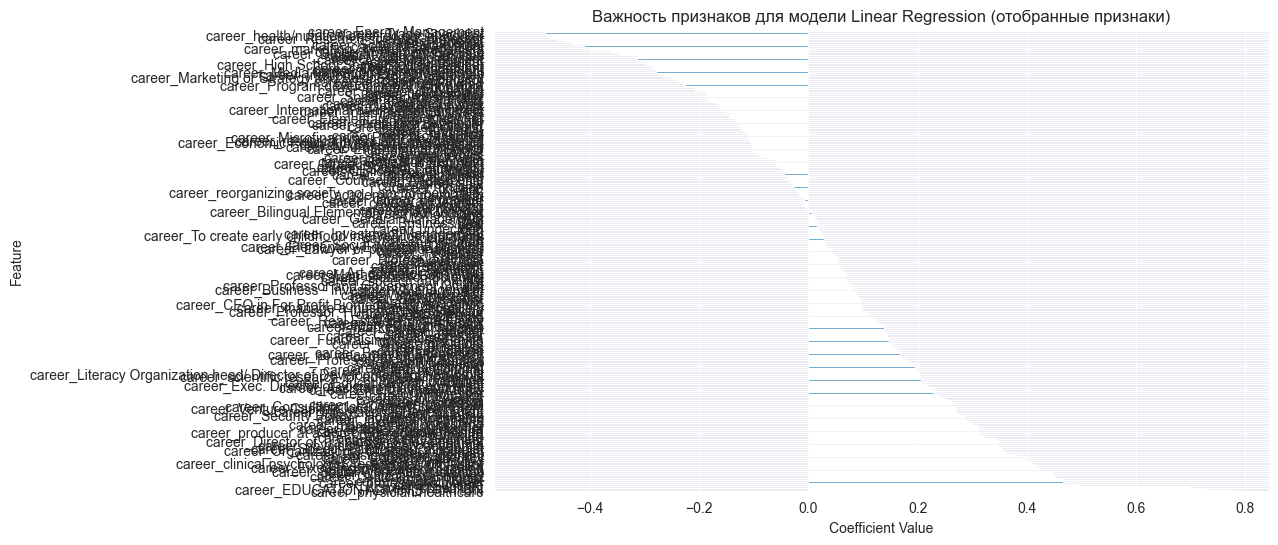

In [117]:
# Построение графика с важностью коэффициентов
plt.figure(figsize=(10, 6))
coef_importance_selected = pd.Series(linear_reg_selected.coef_, index=selected_features)
coef_importance_selected_sorted = coef_importance_selected.sort_values(ascending=False)
coef_importance_selected_sorted.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Важность признаков для модели Linear Regression (отобранные признаки)')
plt.show()

**7. Сделать вывод:**

**Лучшим регрессором, обученным на данных с категориальными признаками**, является модель **Linear Regression**.

**Лучшим регрессором, обученным на данных без категориальных признаков**, так же является модель **Linear Regression**.


**Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).**



Сравнивая  значения с предыдущими результатами без RFE, мы можем сделать следующий вывод:

- **MSE:** Значение MSE с RFE уменьшилось с, что говорит о улучшении точности модели.
- **MAE:** Значение MAE с RFE также сократилось, что указывает на лучшую предсказательную способность модели.
- **R^2 Score:** Значение R^2 Score осталось практически на том же уровне, что может свидетельствовать о том, что модель все так же хорошо объясняет вариацию целевой переменной.

Использование Recursive Feature Elimination привело к улучшению качества модели.